In [1]:
import hipopy as hp
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
hep.style.use("CMS")
import glob

In [2]:
data_directory = "/work/clas12/pecar/RICH/gemcSim/clas12-rich-sim/clas12Tags-5.10/recoFiles/DIS/default/allOpticsNominal/"
file_name = "RECO_DIS_default_skimp2p5_allOpticsNominal_1599.hipo"

In [3]:
RICH_ring = {"cherenkov_angle":[], "pindex":[]}
RICH_hits = {"x":[], "y":[], "sector":[], "time":[], "cluster":[], "xtalk":[], "pmt":[]}
rec_particles = {"pid":[], "px":[], "py":[], "pz":[]}
truth_particles = {"pid":[], "px":[], "py":[], "pz":[]}
for i, file_name in enumerate(glob.glob(f"{data_directory}/*")[:1]):
    file = hp.open(file_name,mode='r')
    for event in file:
        RICH_ring["cherenkov_angle"].append(file.getFloats('RICH::Ring','etaC'))
        RICH_ring["pindex"].append(file.getBytes('RICH::Ring', 'pindex'))
        rec_particles["pid"].append(file.getInts('REC::Particle', 'pid'))
        rec_particles["px"].append(file.getFloats('REC::Particle', 'px'))
        rec_particles["py"].append(file.getFloats('REC::Particle', 'py'))
        rec_particles["pz"].append(file.getFloats('REC::Particle', 'pz'))
        RICH_hits["x"].append(file.getFloats('RICH::Hit', 'x'))
        RICH_hits["y"].append(file.getFloats('RICH::Hit', 'y'))
        RICH_hits["cluster"].append(file.getShorts('RICH::Hit', 'cluster'))
        RICH_hits["xtalk"].append(file.getShorts('RICH::Hit', 'xtalk'))
        RICH_hits["time"].append(file.getFloats('RICH::Hit', 'time'))
        RICH_hits["sector"].append(file.getShorts('RICH::Hit', 'sector'))
        RICH_hits["pmt"].append(file.getShorts('RICH::Hit', 'pmt'))
        truth_particles["pid"].append(file.getInts('MC::Particle', 'pid'))
        truth_particles["px"].append(file.getFloats('MC::Particle', 'px'))
        truth_particles["py"].append(file.getFloats('MC::Particle', 'py'))
        truth_particles["pz"].append(file.getFloats('MC::Particle', 'pz'))

In [4]:
RICH_ring = ak.Array(RICH_ring)
RICH_hits = ak.Array(RICH_hits)
rec_particles = ak.Array(rec_particles)
truth_particles = ak.Array(truth_particles)

In [5]:
RICH_hits = RICH_hits[(RICH_hits["cluster"]==0) & (RICH_hits["xtalk"]==0) & (RICH_hits["pmt"]>0) & (RICH_hits["pmt"]<392)]

In [6]:
rec_particles["p"] = np.sqrt(rec_particles["px"]**2 + rec_particles["py"]**2 + rec_particles["pz"]**2)
rec_particles = rec_particles[rec_particles["p"]>0]
truth_particles["p"] = np.sqrt(truth_particles["px"]**2 + truth_particles["py"]**2 + truth_particles["pz"]**2)
truth_particles = truth_particles[truth_particles["p"]>0]

/scratch/slurm/51590738/.cache/tmp/ipykernel_325155/1305303147.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.array(ak.flatten(matching_particle_momenta)),
/scratch/slurm/51590738/.cache/tmp/ipykernel_325155/1305303147.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.array(ak.flatten(RICH_ring["cherenkov_angle"])),


Text(0.5, 1.0, 'File 1599: RICH::Ring')

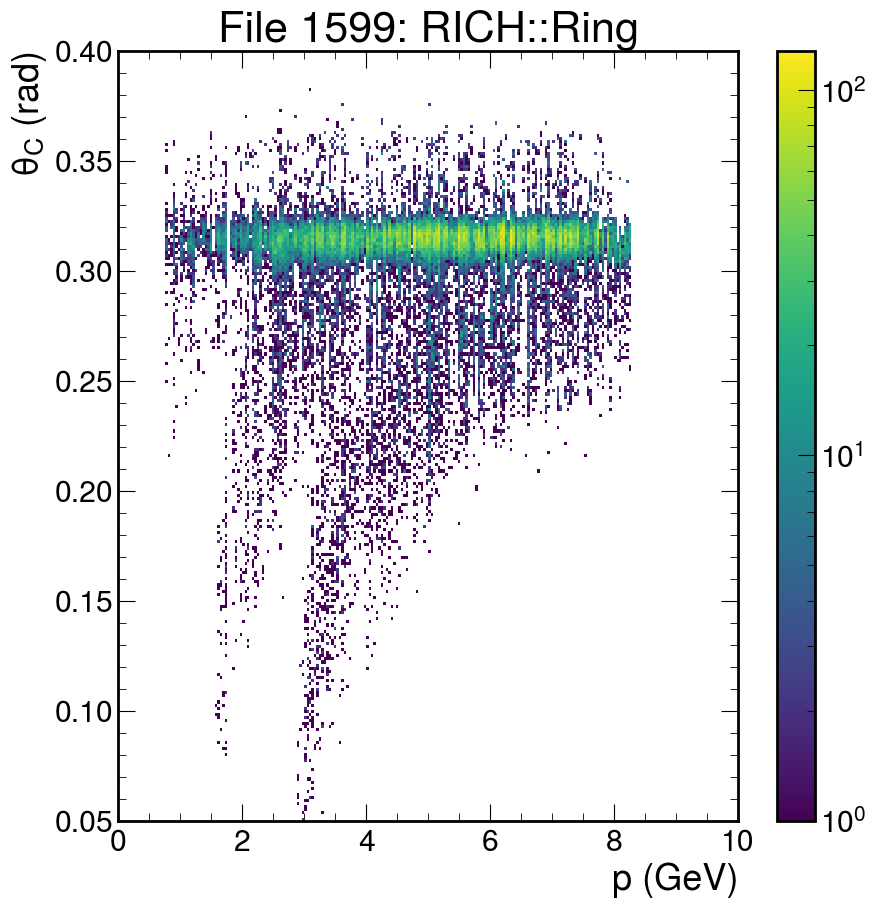

In [7]:
matching_particle_momenta = rec_particles["p"][RICH_ring["pindex"]]
plt.hist2d(
    np.array(ak.flatten(matching_particle_momenta)),
    np.array(ak.flatten(RICH_ring["cherenkov_angle"])),
    bins=250,
    range=( (0,10), (.05, .4)),
    norm = colors.LogNorm()
) 
plt.xlabel("p (GeV)")
plt.ylabel("$\\theta_C~(rad)$")
plt.colorbar()
plt.title("File 1599: RICH::Ring")

Text(0.5, 1.0, 'Reconstructed RICH hits')

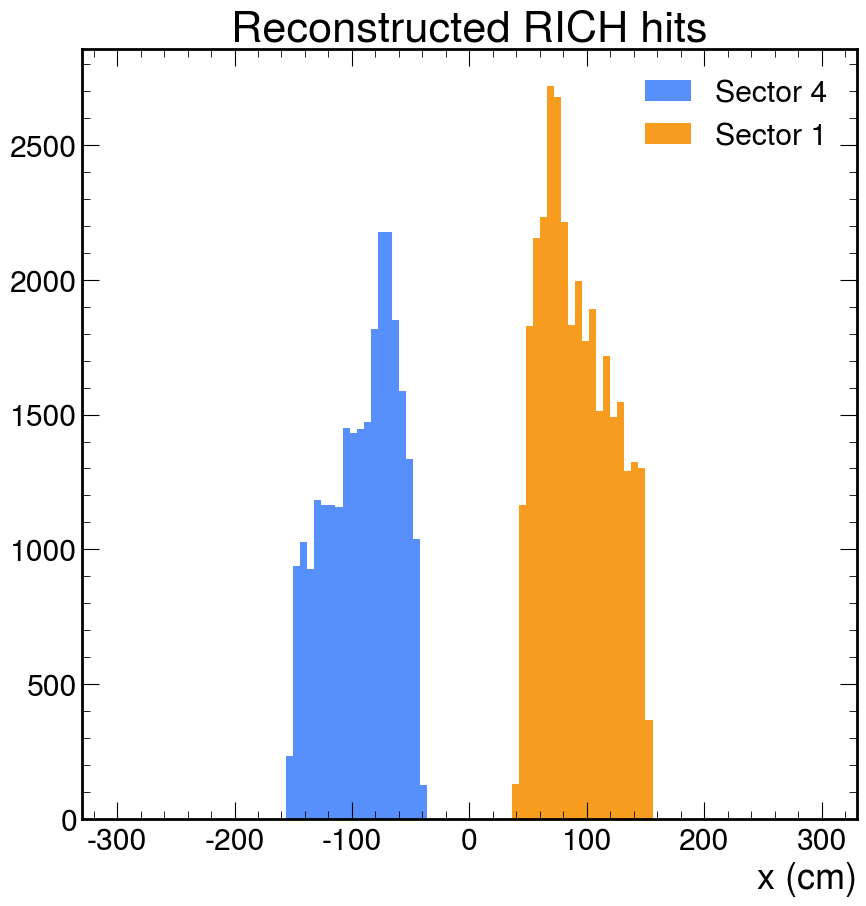

In [8]:
plt.hist(ak.flatten(RICH_hits["x"])[ak.flatten(RICH_hits["sector"])==4], bins=100, range=(-300,300), label="Sector 4")
plt.hist(ak.flatten(RICH_hits["x"])[ak.flatten(RICH_hits["sector"])==1], bins=100, range=(-300,300), label="Sector 1")
plt.xlabel("x (cm)")
plt.legend()
plt.title("Reconstructed RICH hits")

Text(0.5, 1.0, 'Reconstructed RICH hits')

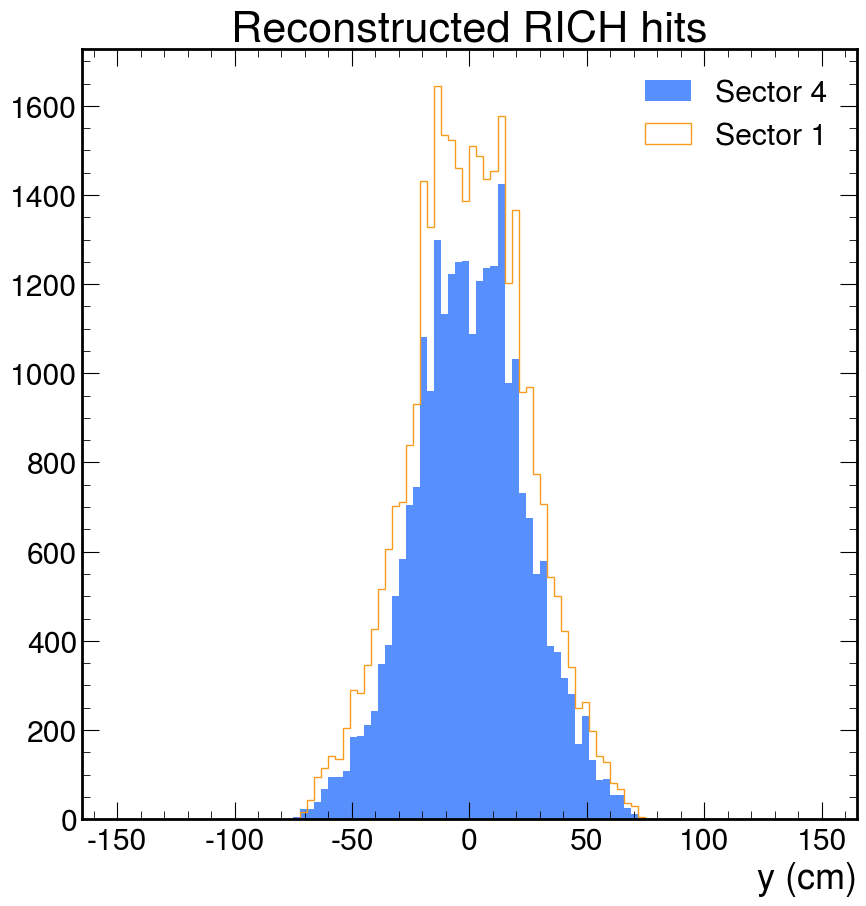

In [9]:
plt.hist(ak.flatten(RICH_hits["y"])[ak.flatten(RICH_hits["sector"])==4], bins=100, range=(-150,150), label="Sector 4")
plt.hist(ak.flatten(RICH_hits["y"])[ak.flatten(RICH_hits["sector"])==1], bins=100, range=(-150,150), label="Sector 1", histtype='step')
plt.xlabel("y (cm)")
plt.legend()
plt.title("Reconstructed RICH hits")

Text(0.5, 1.0, 'File 1599: RICH::Hits')

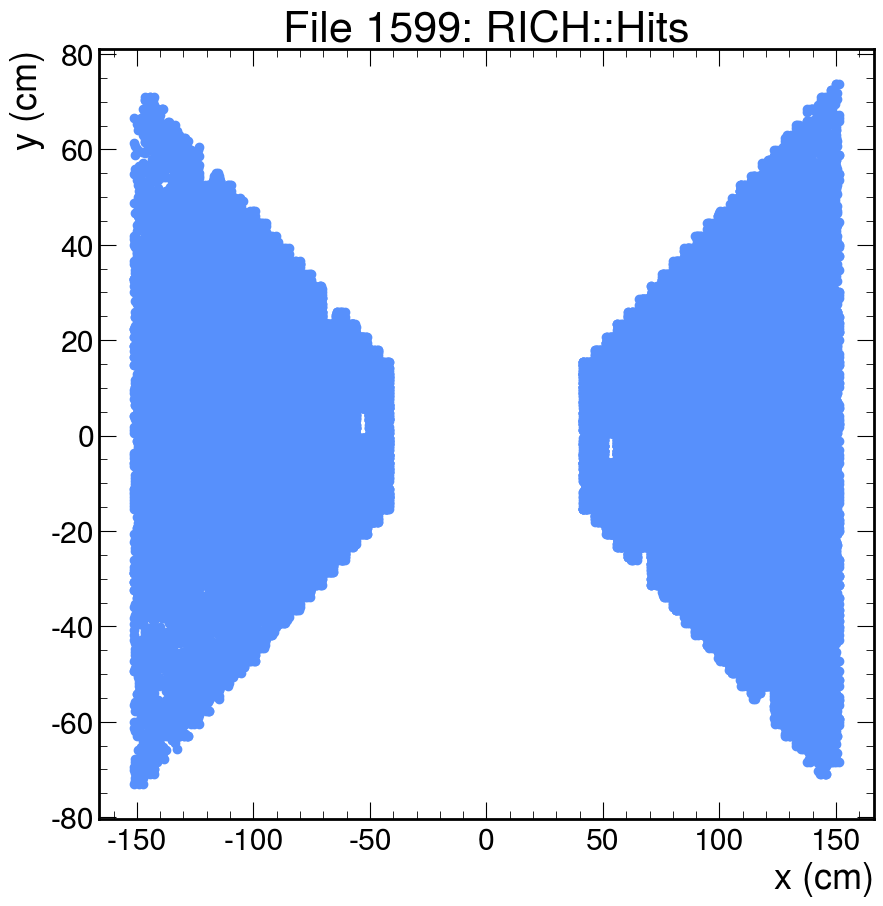

In [10]:
plt.scatter(ak.flatten(RICH_hits["x"]), ak.flatten(RICH_hits["y"]))
plt.ylabel("y (cm)")
plt.xlabel("x (cm)")
plt.title("File 1599: RICH::Hits")

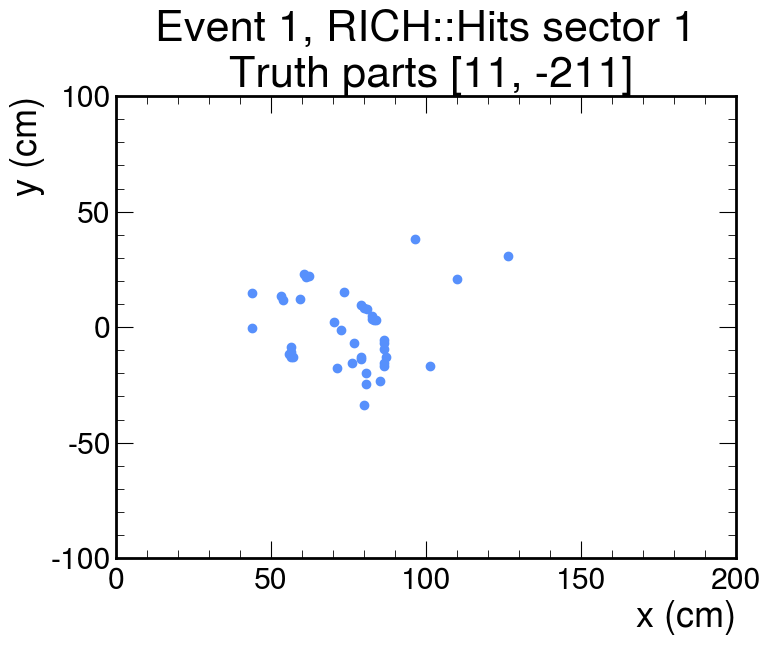

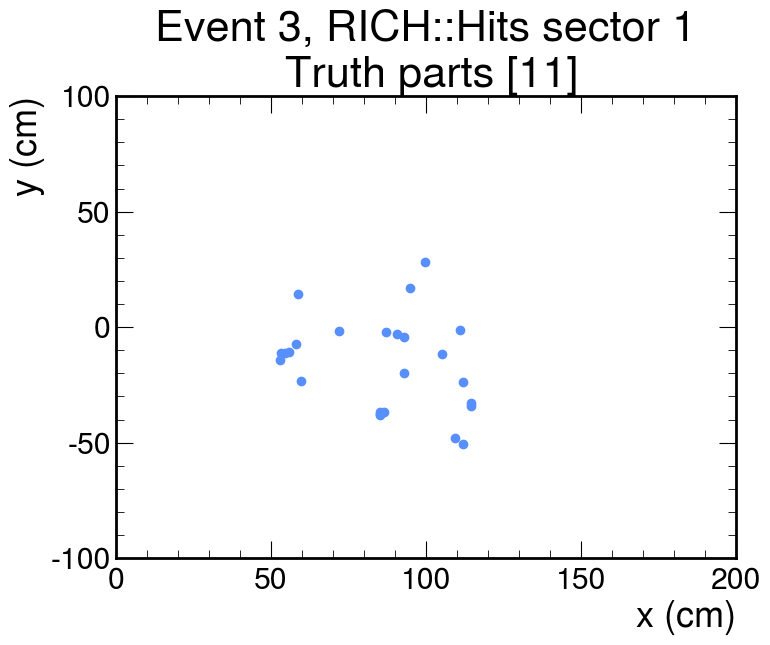

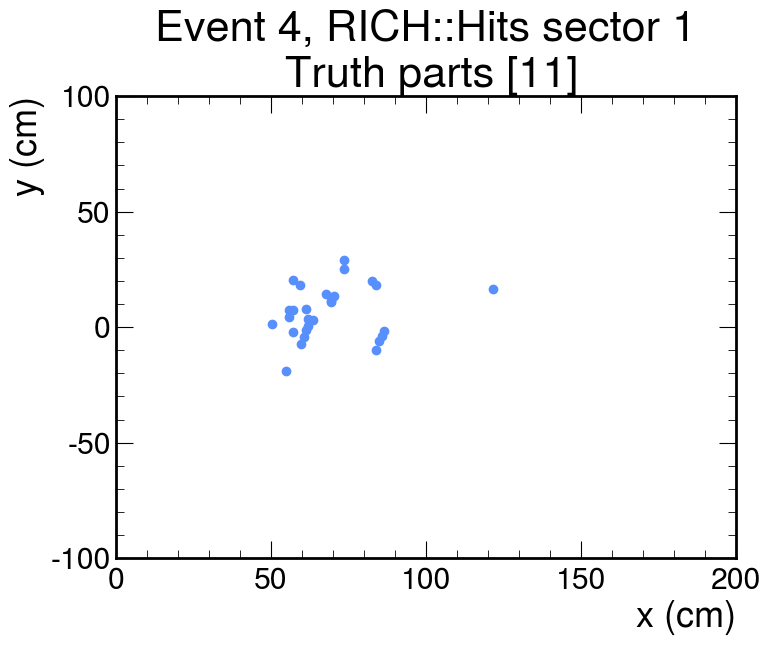

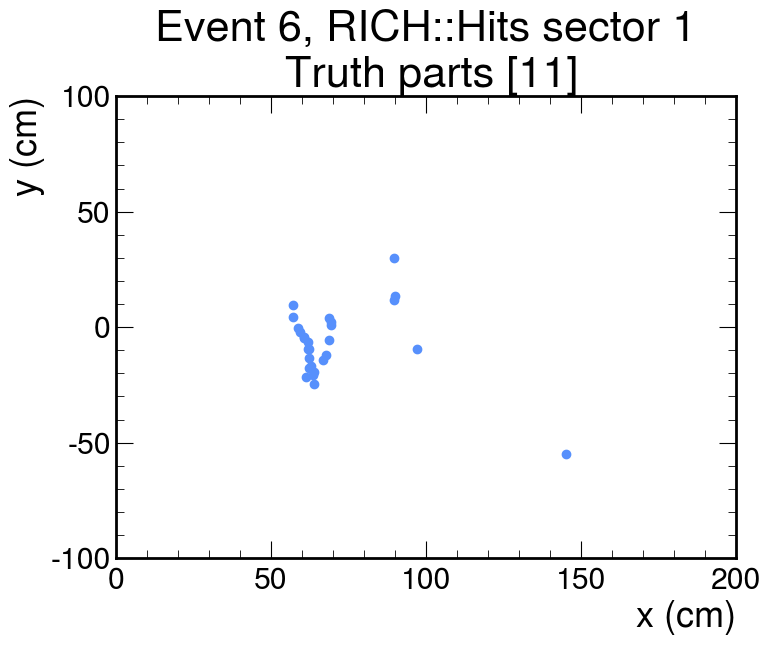

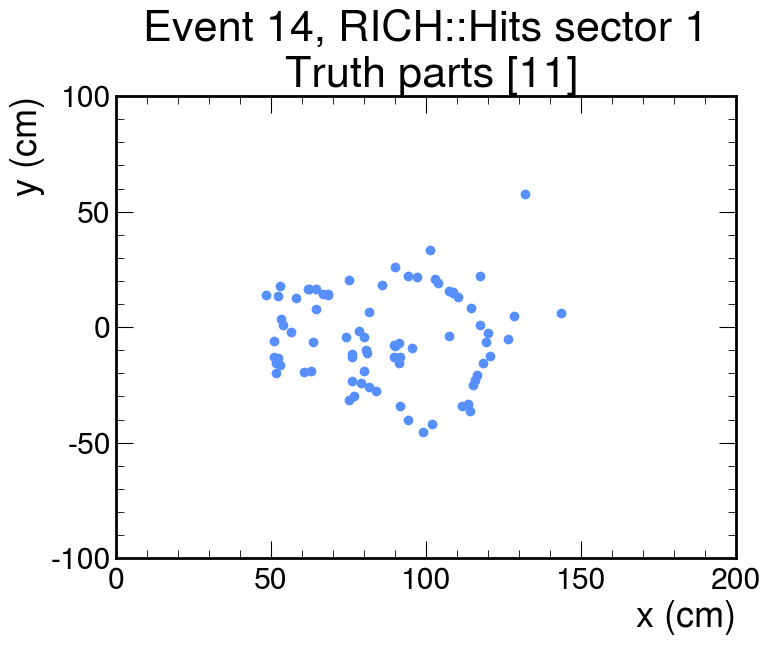

In [11]:
import matplotlib.pyplot as plt
import time

sector=1
sector_mask = RICH_hits["sector"]==sector
for event_num,(x, y) in enumerate(zip(RICH_hits["x"][sector_mask], RICH_hits["y"][sector_mask])):
    if event_num > 20:
        break
    if len(x)==0:
        continue
    if len(truth_particles['pid'][event_num])==0:
        continue
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y)
    plt.xlim(0, 200)
    plt.ylim(-100, 100)
    plt.xlabel("x (cm)")
    plt.ylabel("y (cm)")
    plt.title(f"Event {event_num}, RICH::Hits sector 1\n Truth parts {truth_particles['pid'][event_num]}")
    plt.show()
    

### Removing reconstructed particles that do not have a trajectory in the RICH

### Calculating theta and phi for all the particles to do reco-truth matching

In [12]:
truth_particles["phi"] = np.atan2(truth_particles["py"], truth_particles["px"])
truth_particles["phi"] = ak.where(truth_particles["phi"] < 0, truth_particles["phi"] + 2 * np.pi, truth_particles["phi"])*180/np.pi
rec_particles["phi"] = np.atan2(rec_particles["py"], rec_particles["px"])
rec_particles["phi"] = ak.where(rec_particles["phi"] < 0, rec_particles["phi"] + 2 * np.pi, rec_particles["phi"])*180/np.pi
truth_particles["theta"] = np.arccos(truth_particles["pz"]/truth_particles["p"]) * 180/np.pi
rec_particles["theta"] = np.arccos(rec_particles["pz"]/rec_particles["p"]) * 180/np.pi

There are two peaks because the data files only store events with hits in the RICH. This makes most particles have phi in the two sectors with the RICH (1 and 4)

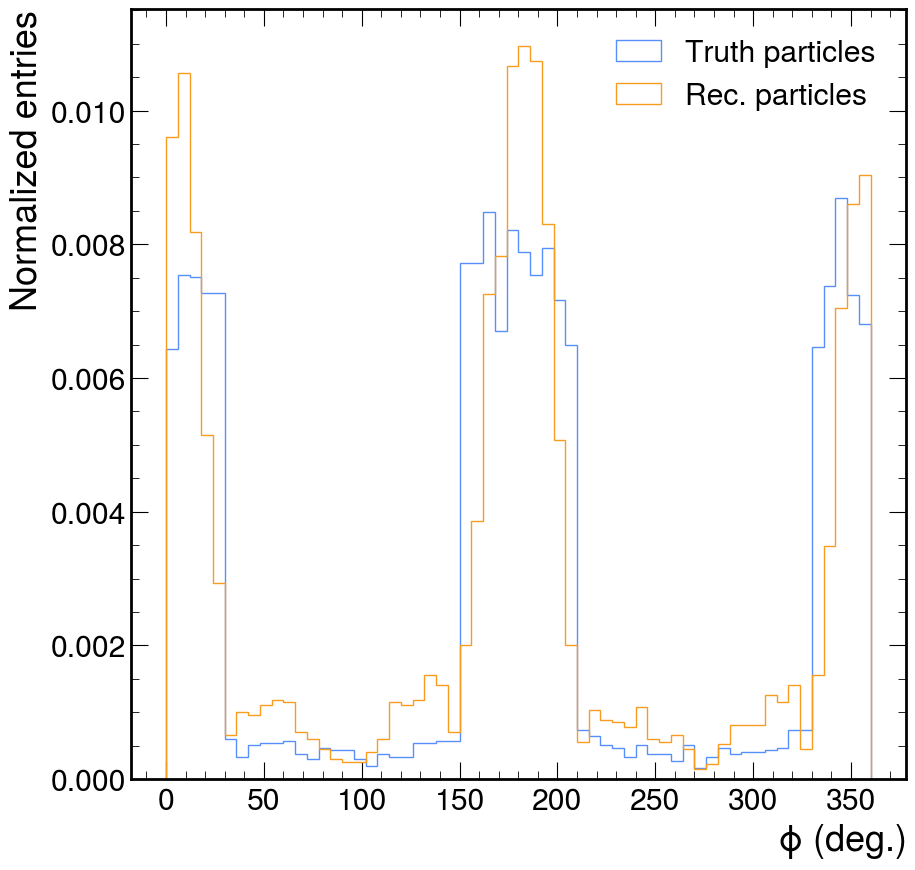

In [13]:
fig = plt.figure()
plt.hist(
    ak.flatten(truth_particles["phi"]),
    bins = 60,
    range = (0, 360),
    label = "Truth particles",
    histtype='step',
    density=True
)

plt.hist(
    ak.flatten(rec_particles["phi"]),
    bins = 60,
    range = (0, 360),
    label = "Rec. particles",
    histtype='step',
    density=True
)
plt.xlabel("$\phi$ (deg.)")
plt.ylabel("Normalized entries")
plt.legend()

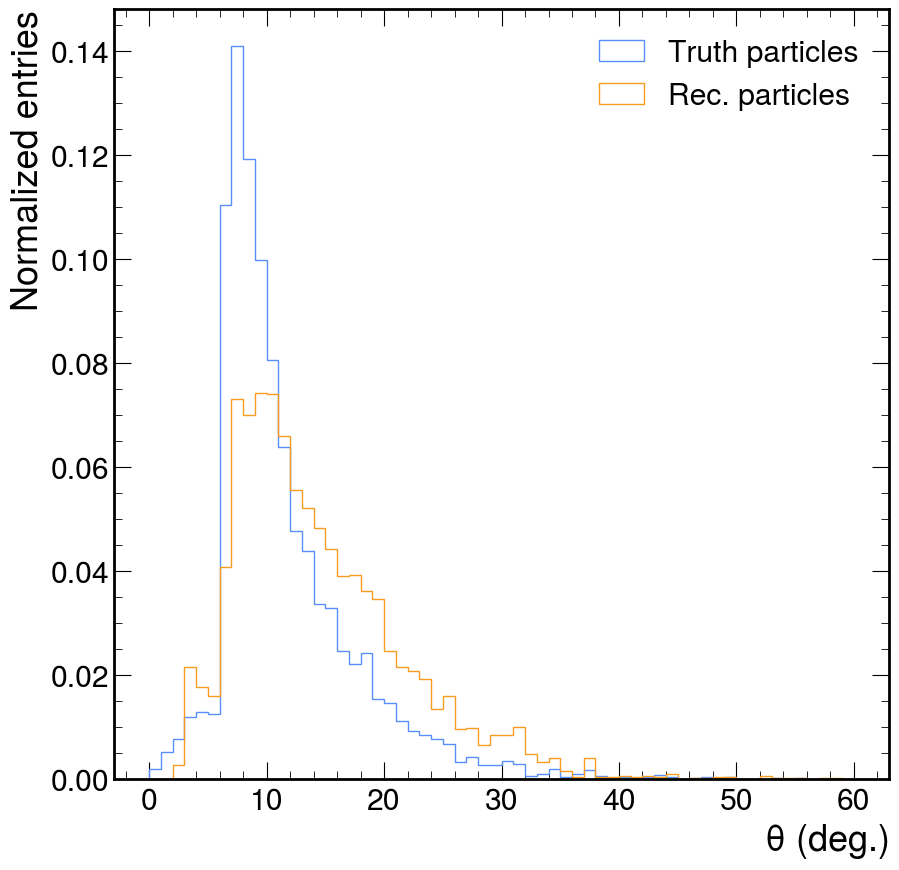

In [14]:
fig = plt.figure()
plt.hist(
    ak.flatten(truth_particles["theta"]),
    bins = 60,
    range=(0,60),
    label = "Truth particles",
    histtype='step',
    density = True
)

plt.hist(
    ak.flatten(rec_particles["theta"]),
    bins = 60,
    range=(0,60),
    label = "Rec. particles",
    histtype='step',
    density = True
)
plt.xlabel("$\\theta$ (deg.)")
plt.ylabel("Normalized entries")
plt.legend()

### Calculating angular separation between truth and reco particles
- For each truth particle, we match only 1 reco particle to it by choosing the reco particle that minimizes $\Delta R = \sqrt{ (\phi_{truth} - \phi_{rec})^2 + (\theta_{truth} - \theta_{rec})^2}$
- If two truth particles correspond to the same reconstructed particle, we keep the matching with the smaller $\Delta R$ value. The other particle then gets matched to the next smallest $\Delta R$ value. If there are no more reconstructed particles in the event, we say the particle isn't matched.
- All truth particles that aren't matched aren't given a matching index of -1.

In [24]:
def angular_difference(a, b):
    diff = (a - b + 180) % 360 - 180
    return diff

In [25]:
delta_R = []
num_events_with_multiple = 0

for event in range(len(truth_particles["theta"])):
    delta_R_event = []
    matching_index_event = []
    for truth_phi, truth_theta in zip(truth_particles["phi"][event], truth_particles["theta"][event]):
        delta_R_particle = []
        for rec_phi, rec_theta in zip(rec_particles["phi"][event], rec_particles["theta"][event]):
            delta_R_particle.append(np.sqrt( angular_difference(truth_phi, rec_phi)**2 + (truth_theta - rec_theta)**2))
        delta_R_event.append(delta_R_particle)
    delta_R.append(delta_R_event)

In [26]:
def find_second_smallest(arr):
    if len(arr) < 2:
        return -1
    sorted_indices = np.argsort(arr)
    second_smallest_index = sorted_indices[1]
    return second_smallest_index

In [27]:
matching_index, min_delta_R = [], []
for delta_R_event in delta_R:
    matching_index_event = []
    min_delta_R_event = []
    for particle_delta_R in delta_R_event:
        if len(particle_delta_R) == 0:
            matching_index_event.append(-1)
            min_delta_R_event.append(-1)
            continue
        min_index = np.argmin(particle_delta_R)
        min_delta_R_particle = particle_delta_R[min_index]
        # Handling the case where two truth particles correspond to the same reco particle
        # In this case, keep the particle with the smaller Delta R value.
        # Give the other particle the next smallest Delta R matching. If there isn't one, append -1
        if min_index in matching_index_event:
            other_particle_index = matching_index_event.index(min_index)
            other_particle_deltaR = min_delta_R_event[other_particle_index]
            if min_delta_R_particle < other_particle_deltaR:
                # Add this particle
                matching_index_event.append(min_index)
                min_delta_R_event.append(min_delta_R_particle)
                # Get second lowest delta R for other particle
                all_other_delta_R = delta_R_event[other_particle_index]
                second_smallest_index = find_second_smallest(all_other_delta_R)
                matching_index_event[other_particle_index] = second_smallest_index
                min_delta_R_event[other_particle_index] = all_other_delta_R[second_smallest_index] if second_smallest_index > -1 else -1
            else:
                second_smallest_index = find_second_smallest(particle_delta_R)
                matching_index_event.append(second_smallest_index)
                min_delta_R_event.append(particle_delta_R[second_smallest_index] if second_smallest_index > -1 else -1)
        else:
            matching_index_event.append(min_index)
            min_delta_R_event.append(min_delta_R_particle)
    matching_index.append(matching_index_event)
    min_delta_R.append(min_delta_R_event)

In [28]:
matching_index = ak.Array(matching_index)
min_delta_R = ak.Array(min_delta_R)

Text(0, 1, 'Entries (log)')

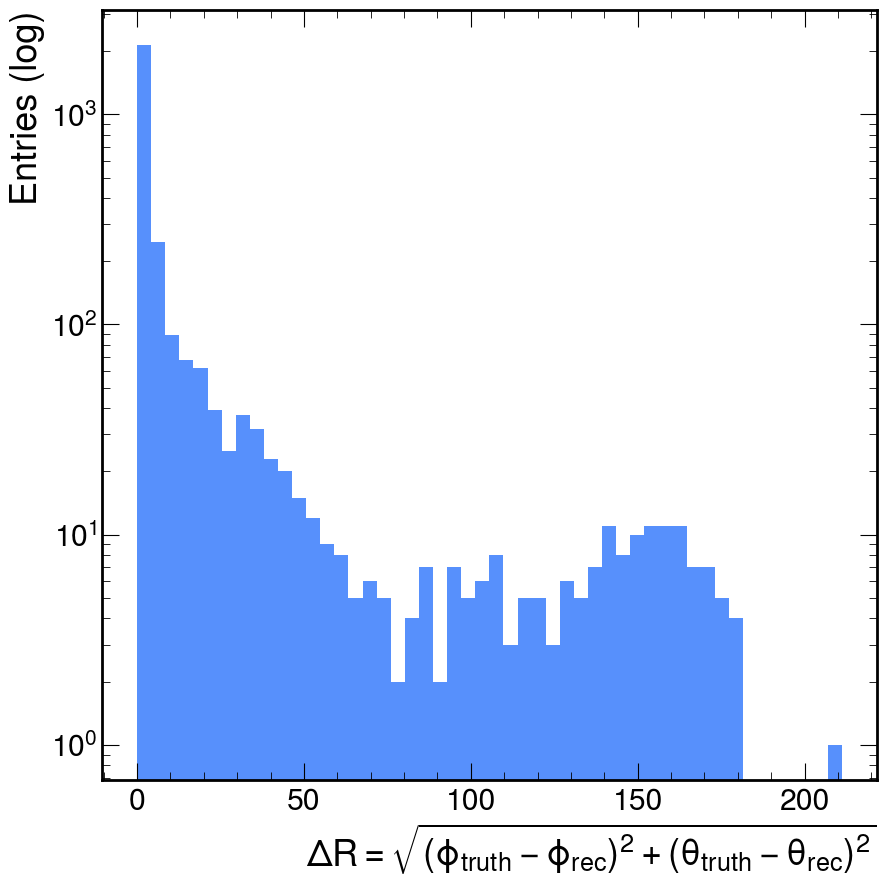

In [29]:
plt.hist(
    ak.flatten(min_delta_R[matching_index>-1]),
    bins=50);
plt.yscale('log')
plt.xlabel("$\Delta R = \sqrt{ (\phi_{truth} - \phi_{rec})^2 + (\\theta_{truth} - \\theta_{rec})^2}$")
plt.ylabel("Entries (log)")
